# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Imported the dependencies and setup:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Imported the OpenWeatherMap API key:
from api_keys import weather_api_key

# Imported citipy to determine the cities based on latitude and longitude:
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Created an empty list to hold the latitude and longitude combinations:
lat_lngs = []

# Created an empty list to hold the cities names:
cities = []

# Set the possible range of latitudes and longitudes:
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set the seed to get consistent results every time this entire code is run and then created a
# set of random lat and lng combinations:
np.random.seed(494226)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identified the nearest city for each lat, lng combination:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city was unique, then it was added to the cities list:
    if city not in cities:
        cities.append(city)

# Printed the city count to confirm it was sufficient:
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL and the units:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Defined an empty list to fetch the weather data for each city:
city_data = []

# Printed to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Created counters:
record_count = 1
set_count = 1

# Looped through all the cities in the list to fetch the weather data:
for i, city in enumerate(cities):
        
    # Grouped cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Created endpoint URL with each city:
    city_url = url + 'appid=' + weather_api_key + '&units=' + units + '&q=' + city
    
    # Logged the url, record, and set numbers:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Added 1 to the record count:
    record_count += 1

    # Ran an API request for each of the cities:
    try:
        # Parsed the JSON and retrieved the data:
        city_weather = requests.get(city_url).json()

        # Parsed out latitude, longitude, max temperature, humidity, cloudiness, wind speed, country, and date:
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Appended the city information into the 'city_data' list:
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error was encountered, skipped the city:
    except:
        print("City not found. Skipping...")
        pass
              
# Indicated that the 'Data Loading' was complete:
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bolshoye soldatskoye
City not found. Skipping...
Processing Record 2 of Set 1 | marzuq
Processing Record 3 of Set 1 | mbandaka
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | abu dhabi
Processing Record 9 of Set 1 | oranjemund
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | troyes
Processing Record 13 of Set 1 | ferme-neuve
Processing Record 14 of Set 1 | mogadishu
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | morganton
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing R

Processing Record 34 of Set 4 | isangel
Processing Record 35 of Set 4 | oruro
Processing Record 36 of Set 4 | labutta
City not found. Skipping...
Processing Record 37 of Set 4 | vila franca do campo
Processing Record 38 of Set 4 | lensk
Processing Record 39 of Set 4 | presidente medici
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | khani
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | itanhandu
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | gwembe
Processing Record 46 of Set 4 | lolua
City not found. Skipping...
Processing Record 47 of Set 4 | guozhen
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | andapa
Processing Record 0 of Set 5 | rio gallegos
Processing Record 1 of Set 5 | sofiysk
City not found. Skipping...
Processing Record 2 of Set 5 | comodoro rivadavia
Processing Record 3 of Set 5 | hermanus
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | sao joao

Processing Record 18 of Set 8 | mount gambier
Processing Record 19 of Set 8 | puerto pailas
Processing Record 20 of Set 8 | hovd
Processing Record 21 of Set 8 | altagracia de orituco
Processing Record 22 of Set 8 | port lincoln
Processing Record 23 of Set 8 | kaputa
Processing Record 24 of Set 8 | puerto baquerizo moreno
Processing Record 25 of Set 8 | brainerd
Processing Record 26 of Set 8 | colon
Processing Record 27 of Set 8 | shingu
Processing Record 28 of Set 8 | limon
Processing Record 29 of Set 8 | barra da estiva
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | gushikawa
Processing Record 32 of Set 8 | meyungs
City not found. Skipping...
Processing Record 33 of Set 8 | sawtell
Processing Record 34 of Set 8 | maceio
Processing Record 35 of Set 8 | noumea
Processing Record 36 of Set 8 | kushalgarh
Processing Record 37 of Set 8 | khorinsk
Processing Record 38 of Set 8 | elliot lake
Processing Record 39 of Set 8 | conceicao do araguaia
Processing Record 

City not found. Skipping...
Processing Record 5 of Set 12 | ola
Processing Record 6 of Set 12 | krapivinskiy
Processing Record 7 of Set 12 | coihaique
Processing Record 8 of Set 12 | adrar
Processing Record 9 of Set 12 | nezhinka
Processing Record 10 of Set 12 | naron
Processing Record 11 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 12 of Set 12 | sao miguel do oeste
City not found. Skipping...
Processing Record 13 of Set 12 | nardaran
Processing Record 14 of Set 12 | shache
Processing Record 15 of Set 12 | san ramon
Processing Record 16 of Set 12 | tromso
Processing Record 17 of Set 12 | antofagasta
Processing Record 18 of Set 12 | stromness
Processing Record 19 of Set 12 | tura
Processing Record 20 of Set 12 | san antonio
Processing Record 21 of Set 12 | inhambane
Processing Record 22 of Set 12 | jinchang
Processing Record 23 of Set 12 | mitu
Processing Record 24 of Set 12 | urusha
Processing Record 25 of Set 12 | varna
Processing Record 26 of Set 12 | dutlwe


In [4]:
# Converted the cities weather data into a Pandas DataFrame:
city_data_df = pd.DataFrame(city_data)

# Showed the record count:
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [5]:
# Displayed the sample data:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marzuq,14.4000,46.4667,21.39,72,6,2.48,YE,1681518890
1,mbandaka,0.0487,18.2603,22.01,95,100,0.98,CD,1681518890
2,kapaa,22.0752,-159.3190,26.18,71,75,6.17,US,1681518516
3,bengkulu,-3.8004,102.2655,26.36,77,73,1.71,ID,1681518891
4,hobart,-42.8794,147.3294,16.81,76,75,2.06,AU,1681518601


In [6]:
# Exported the 'city_data_df' into a CSV file:
city_data_df.to_csv("../output-data/cities.csv", index_label="City_ID")

In [7]:
# Read the saved data:
city_data_df = pd.read_csv("../output-data/cities.csv", index_col="City_ID")

# Displayed the sample data:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marzuq,14.4000,46.4667,21.39,72,6,2.48,YE,1681518890
1,mbandaka,0.0487,18.2603,22.01,95,100,0.98,CD,1681518890
2,kapaa,22.0752,-159.3190,26.18,71,75,6.17,US,1681518516
3,bengkulu,-3.8004,102.2655,26.36,77,73,1.71,ID,1681518891
4,hobart,-42.8794,147.3294,16.81,76,75,2.06,AU,1681518601


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

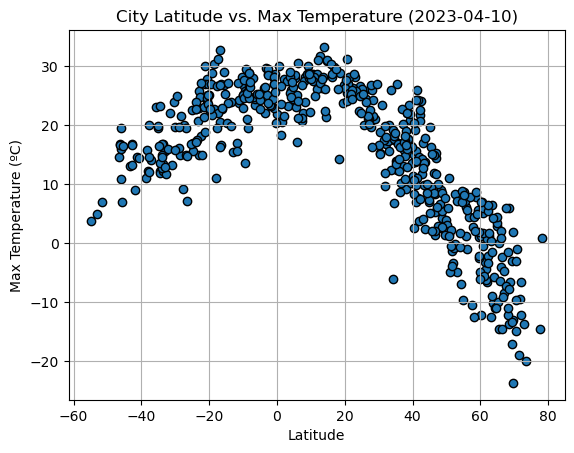

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-04-10)')
plt.ylabel('Max Temperature (ºC)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('../output-data/Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

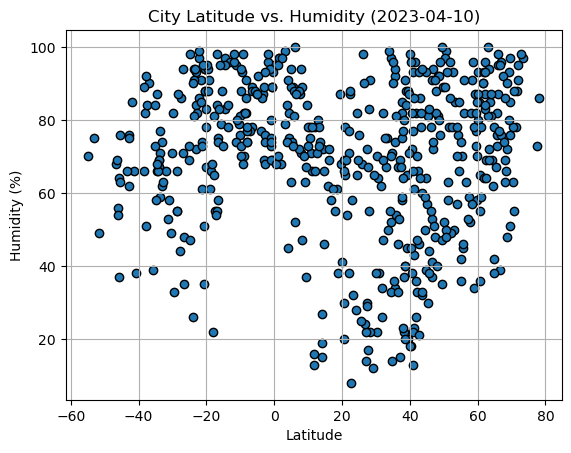

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-04-10)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('../output-data/Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

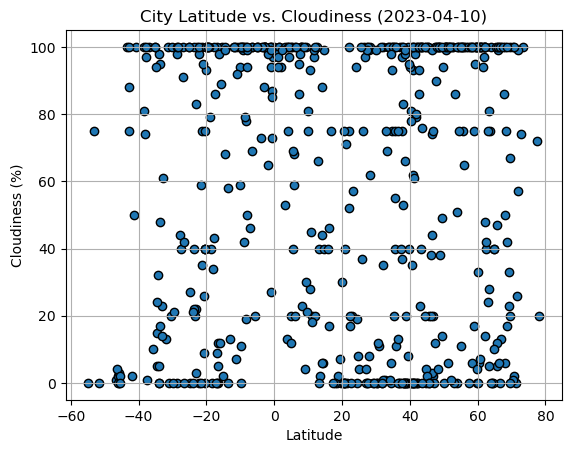

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-04-10)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('../output-data/Fig3.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

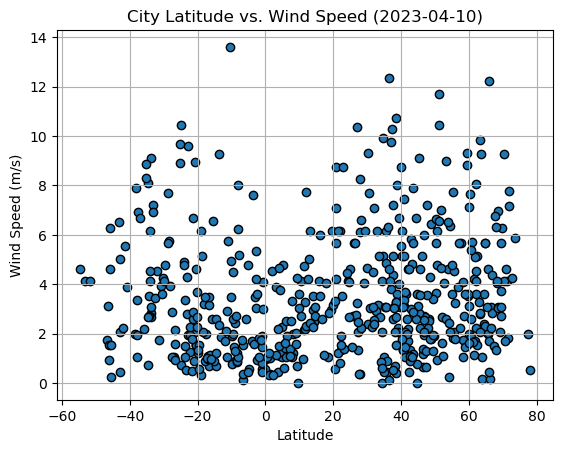

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-04-10)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('../output-data/Fig4.png')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregplots(xvalues, yvalues, labelx, labely, xy):
    x_values = xvalues
    y_values = yvalues
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-', linewidth=2)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.annotate(line_eq, xy, fontsize=15, color='red')
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marzuq,14.4000,46.4667,21.39,72,6,2.48,YE,1681518890
1,mbandaka,0.0487,18.2603,22.01,95,100,0.98,CD,1681518890
2,kapaa,22.0752,-159.3190,26.18,71,75,6.17,US,1681518516
5,qaanaaq,77.4840,-69.3632,-14.45,73,72,2.00,GL,1681518891
6,abu dhabi,24.4667,54.3667,26.64,65,0,4.12,AE,1681518601


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bengkulu,-3.8004,102.2655,26.36,77,73,1.71,ID,1681518891
4,hobart,-42.8794,147.3294,16.81,76,75,2.06,AU,1681518601
7,oranjemund,-28.5500,16.4333,15.00,66,0,5.75,NaN,1681518892
8,rikitea,-23.1203,-134.9692,25.88,72,22,4.31,PF,1681518512
14,mar del plata,-38.0023,-57.5575,12.19,82,74,1.03,AR,1681518427


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7776208646214264


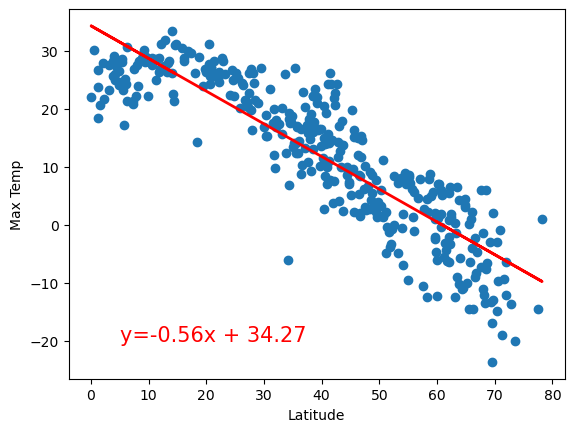

In [15]:
# Linear regression on Northern Hemisphere
linregplots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (5,-20))

The r-value is: 0.5237293935230543


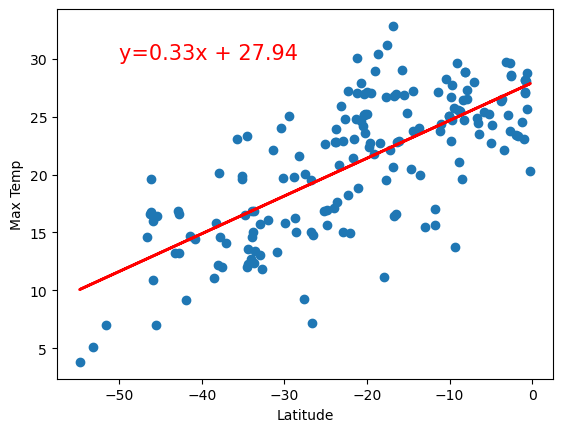

In [16]:
# Linear regression on Southern Hemisphere
linregplots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01668820070352687


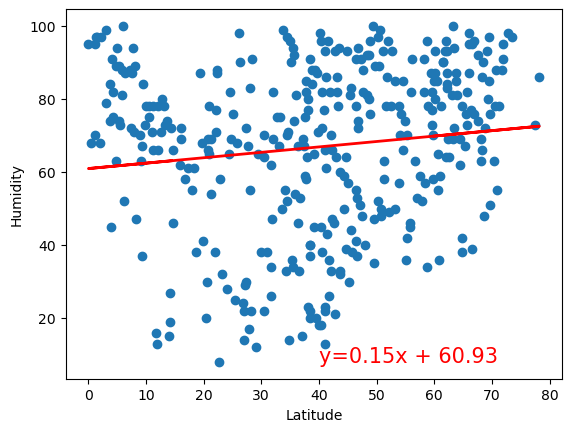

In [18]:
# Northern Hemisphere
linregplots(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (40,8))

The r-value is: 0.0002808747046324607


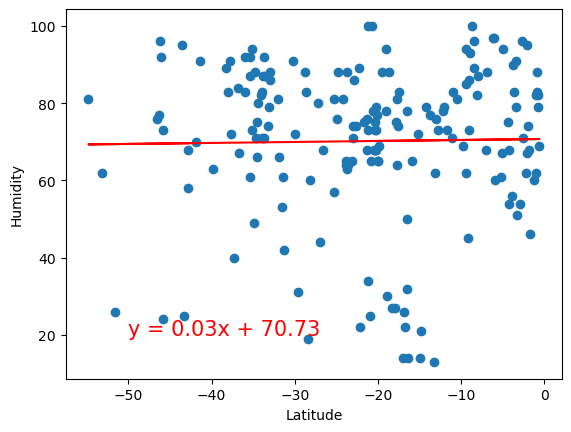

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


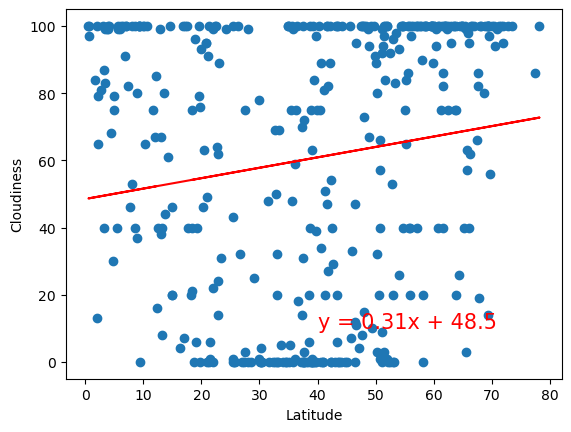

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


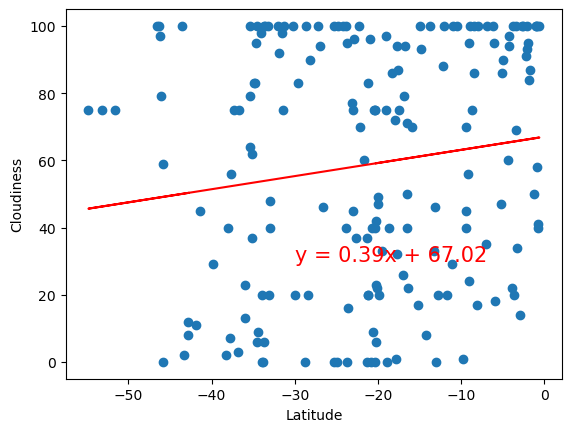

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


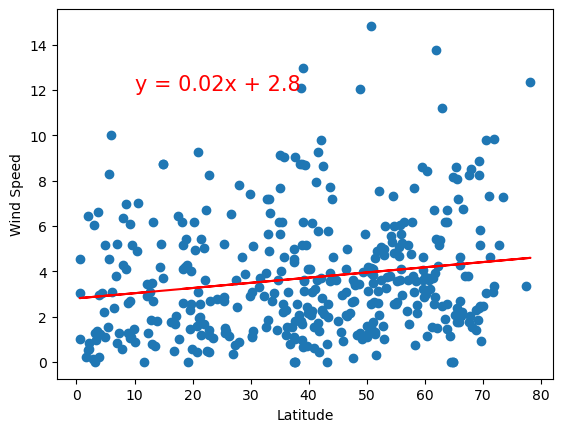

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


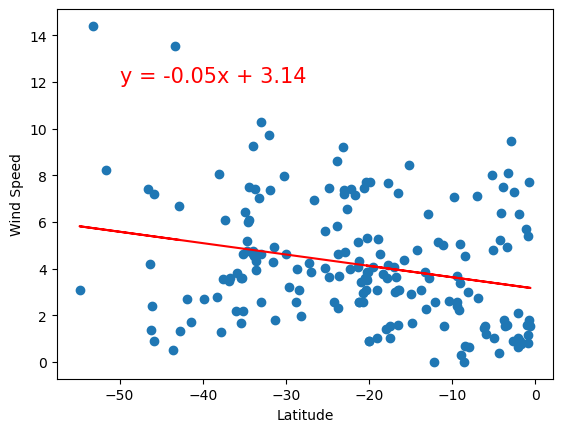

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE